Data Source: https://drive.google.com/file/d/1qRhH__-VyhjvwlQEGxQmcTVUpDQmZgrb/view?usp=sharing

In [ ]:
%matplotlib inline

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import scipy
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
sns.set() #setting the default seaborn style for our plots

## Read the data into the notebook

In [ ]:
df = pd.read_csv('../input/sample-employees-monthly-salary/Employee_monthly_salary.csv') # read the data as a data frame
df["Deduction_percentage"] = pd.to_numeric(df["Deduction_percentage"])
df['EmpID'] = df.EmpID.astype(object)

In [ ]:
df.head() #checking the head of the data frame

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Five-point summary of numerical attributes
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [ ]:
df.info()  #info about the data

### - The data has 1802 instances with 13 attributes. 5 integer type, 1 float type and 7 object type(Strings in the column) 

In [ ]:
df.isna().apply(pd.value_counts)   #null value check

### - There are no null values in any of the column

In [ ]:
df.describe().T  # five point summary of the continuous attributes

### - Data looks legit as all the statistics seem reasonable
### - Looking at the age column, 75% of the employees are 35 or below
### - Very few people have a net salary of more than 1,45,898.
### - There are very few employees who have spent more than FIVE years in the organization

In [ ]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(df.Tenure_in_org_in_months, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No. of months in organization')

plt.subplot(3,3,3)
plt.hist(df.GROSS, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gross monthly salary')

plt.subplot(3,3,4)
plt.hist(df.Net_Pay, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Net monthly salary')

plt.subplot(3,3,5)
plt.hist(df.Deduction_percentage, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Percentage of deduction')

plt.show()

### - Age looks to be quite normally distributed, with most of the employees around 30.
### - Total months spent in organization seems to be right skewed, majority of them are relatively new to the organization.
### - Gross and net monthly salaries seem to be slightly right skewed 
### - Percentage of deduction seems to be normally distributed

In [ ]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Tenure_in_org_in_months),stats.skew(df.GROSS),stats.skew(df.Net_Pay),stats.skew(df.Deduction_percentage)]},
                        index=['Age','tenure','gross','net_pay','deduction_percentage'])  # Measure the skeweness of the required columns
Skewness

### - Skewness of Age and deduction_percentage is very less as seen in the previous step
### - Tenure is skewed
### - Gross and net monthly salaries have huge skewness

In [ ]:
plt.figure(figsize= (30,20))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Tenure_in_org_in_months, color='lightblue')

plt.subplot(5,2,3)
sns.boxplot(x= df.GROSS, color='lightblue')

plt.subplot(5,2,4)
sns.boxplot(x= df.Net_Pay, color='lightblue')

plt.subplot(5,2,5)
sns.boxplot(x= df.Deduction_percentage, color='lightblue')

plt.show()

### - Age and deduction percentage have few extreme values 
### - Net_pay, Gross_pay and tenure are highly skewed, as there are quite a lot of extreme values

In [ ]:
plt.figure(figsize=(20,25))


x = df.Gender.value_counts().index    #Values for x-axis
y = [df['Gender'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,1,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x1 = df.Designation.value_counts().head(7).index    #Values for x-axis
y1 = [df['Designation'].value_counts().head(7)[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,1,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Top designations')

x2 = df.Department.value_counts().head(7).index    #Values for x-axis
y2 = [df['Department'].value_counts().head(7)[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,1,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Department')
plt.ylabel('Count ')
plt.title("Top sized Departments")


df2 = df.nlargest(5,['GROSS'])
x3 = df2.Designation   #Values for x-axis
y3 = df2.GROSS  # Count of each class on y-axis

plt.subplot(4,1,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Designation')
plt.ylabel('Gross Salary')
plt.title("Top earning designations")



plt.show()


### - We see an sparkingly uneven gender ratio 
### - We can see the top departments in terms of employee strength and top designations across the org
### - We can see the top earning designations in terms of gross salary

### Bi-variate distribution of every possible attribute pair

In [ ]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['Gender', 'Designation', 'Department']] = df_encoded.loc[:,['Gender', 'Designation', 'Department']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

### - The only obvious correlation of salary (gross and net) is with gender, there are almost zero female employees earning high salaries  
### - Looks like salary is proportional to 'age'
### - Deduction depends on gross salary and age

# Some of the questions we will try answering:

### 1. Are the number of male and female employees equal in the organization? In other words, is there an inclusive gender ratio?

In [ ]:
### Null Hypothesis - Number of female employees is equal to the number of male employees.
### Alternate Hypothesis - Number of female employees is significantly less than the number of male employees

df.groupby('Gender').size() # Gives the count of the gender in the sample

### Visual representation of the count of the gender in the population

In [ ]:
x = df.Gender.value_counts().index    #Values for x-axis
y = [df['Gender'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,1,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

### Performing a Chi-Square test to perform the hypothesis test to prove the observation statistically

In [ ]:
observed_values    = np.array([499,1303])
expected_values    = np.array([901,901])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)
print('At 5 % level of significance, the p-value is', p_value)
print('At 5 %s level of significance, the chi observed is %1.7f' %('%', chi_square_stat))

### We have sufficient evidence to reject null hypothesis as the p-value is way lesser than 0.05 and the conclusion is that number of female employees is significantly less than the male employees

### 2. Do male employees earn significantly more than female employees?

In [ ]:
#Scatter plot to look for visual evidence of dependency between gross salary and gender accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.Age,df.GROSS,hue=df.Gender,palette= ['green','red'] ,alpha=0.9)
plt.show()

### - Visually the gross salary earned by female employees is significantly less

In [ ]:
# T-test to check dependency of gross salary on gender

Ho = "Gross salary of male and female employees are same"   # Stating the Null Hypothesis
Ha = "Gross salary of female employees are significantly less"   # Stating the Alternate Hypothesis

x = np.array(df[df.Gender == 'M'].GROSS)  # Selecting gross salary of male employees
y = np.array(df[df.Gender == 'F'].GROSS) # Selecting gross salary of female employees

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

##### Female employees earn significantly less than the male employees

### 3. Does salary depend on Age?

##### Lets plot Scatter-plot to look for visual evidence of dependency between attributes "Gross Salary" and "Age"

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.Age, df.GROSS,hue=df.Age,alpha=0.6)
plt.show()

#### Observation: We see there is a positive relation between Gross Salary and Age. In fact, the relation is directly proportional

##### Let's perform statistical test (ANOVA) on Gross Salary and Age to check nature of relation

In [ ]:
bins= [20,30,40,50,60]
labels = ['Twenties','Thirties','Forties','Fifties']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.AgeGroup.value_counts()   #Checking the Age distribution of all employees
#Box plot to visualize dependency between Gross Salary and Age
plt.figure(figsize= (10,8))
sns.boxplot(x = "AgeGroup", y = "GROSS", data = df)
plt.title('Gross Salary distribution among different Age groups')
plt.show()

In [ ]:
# One-way ANOVA to check dependency of Gross Salary on Age
Ho = "Avg gross salary is same across different age groups"   # Stating the Null Hypothesis
Ha = "Avg gross salary is different across different age groups"   # Stating the Alternate Hypothesis

import scipy.stats             as     stats
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

f_crit = stats.f.ppf(q =1-0.05, dfn = 3, dfd = 1802-3)

print("F critical value is", f_crit)
print("\nAnova Table")
mod = ols('GROSS ~ AgeGroup', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#### Conclusion: Since P- value is very less than 0.05 we reject NULL hypothesis. Therefore, it is evident that Avg gross salary is different across different age groups

### 4. Relation between gender and leadership roles

In [ ]:
#We will get the ratio of male & female employees in leadership roles and compare it with 
#the ratio of overall male & female employees and run a z-proportion test to find out:

searchwords = ['Lead','Manag','President','Director','VP']
Leadership_role = np.array(df[df['Designation'].str.contains('|'.join(searchwords))].Gender.value_counts())
overall_ratio = np.array(df.Gender.value_counts())

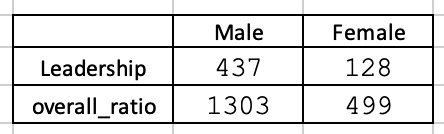

In [ ]:
### Null Hypothesis - Gender has no role in leadership roles
### Alternate Hypothesis - Gender has significant role to play in leadership roles

zscore, pvalue = proportions_ztest(Leadership_role, overall_ratio, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

#### Since p_value < 0.05, we have sufficent evidence to conclude that gender has an effect on Leadership roles. The ratio of male is to female in leadership roles is more than the overall male is to female ratio, in other words there are even fewer female employees in Leadership roles.

### 5. Relation between age and leadership roles

In [ ]:
#We will get the ratio of various age-groups in leadership vs non-leadership roles:

Leadership_role = scipy.array(df[df['Designation'].str.contains('|'.join(searchwords))].AgeGroup.value_counts())
Individual_cont_role = scipy.array(df[df['Designation'].str.contains('|'.join(searchwords))== False].AgeGroup.value_counts())
contingency_array = scipy.array([Leadership_role,Individual_cont_role])
print(contingency_array)

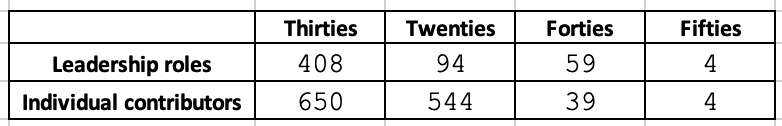

In [ ]:
#We will try to find out with CHI-SQUARE TEST if age is a deciding factor for leadership roles:


## Null Hypothesis: Leadership roles are independent of age
## Alternate Hypothesis: Age has a role to play in leadership roles 

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(contingency_array)
print(f'Chi-square statistic {round(chi_sq_Stat,5)}; P value {p_value}; Degrees of freedom {deg_freedom}')

#### Since p-value < 0.05 we have sufficent evidence to reject null hypothesis. In other words, age has a significant role to play when it comes to Leadership roles

### 6. Are there departments paying significantly low salaries in the organization?

In [ ]:
s_dept_mean_sal = df.groupby('Department').GROSS.mean() #Finding department-wise mean salaries
df_dept_mean_sal = pd.DataFrame(s_dept_mean_sal) # converting the above derived Series into a Dataframe.
np_dept_mean_sal = np.array(df_dept_mean_sal) # converting the above derived Series into an Array.
df_dept_mean_sal.hist()

In [ ]:
## We are going to perform 1 sample Z-Test on all 154 departments to find if there are departments paying significantly high salaries

### Null Hypothesis - The payscale across the departments are equal.
### Alternate Hypothese - The payscale across the departments are not equal.

mu = df.GROSS.mean()
sigma = df.GROSS.std(ddof=1)
n = 1802 # number of records in the sample
se = sigma/np.sqrt(n) # calculating the standard error 
z_crit = 1.96 # Z critical value

Z_value_array = (np_dept_mean_sal - mu)/se # Calculating the Z value 
df_dept_z_value = pd.DataFrame(Z_value_array,index=df_dept_mean_sal.index,columns=["z_value"])

df_consolidated_zscores = pd.concat((df_dept_mean_sal,df_dept_z_value),axis=1, join='inner', sort=False)
df_consolidated_zscores.rename(columns={"0":"z_value"})
df_consolidated_zscores # Joined Dataframe of the Z_value and the mean value of the Gross salary for each department

In [ ]:
#Identifying departments outside the Z-Critical range
unoptimized_salaries = pd.DataFrame(df_consolidated_zscores[(df_consolidated_zscores.z_value > 1.96)|(df_consolidated_zscores.z_value < -1.96)])
unoptimized_salaries

### We reject the null hypothesis as the Z_value is  in the range 𝑍_value  < -1.96 or  𝑍_value > 1.96

### Here is a list of top high paying departments in the organization

In [ ]:
unoptimized_salaries.sort_values(by = 'z_value').head()

### 7. Are Data Scientists getting paid significantly more than others?

##### Let's find out by performing statistical analysis between Data Scientist's salary and salary of other job roles

In [ ]:
# 1 sample Z-Test to check dependency of salary deduction on age
Ho = "Avg Data scientist salary is same as avg salaries of other designations"   # Stating the Null Hypothesis
Ha = "Avg Data scientist salary is higher than avg salaries of other designations"   # Stating the Alternate Hypothesis

searchwords = ['Scientist']
df_data_scientist = df[df['Designation'].str.contains('|'.join(searchwords))]
print('Data Scientist:')
display(df_data_scientist)

In [ ]:
data_scientist_sal_mean = np.array(df_data_scientist.GROSS.mean())    # Mean salary of Data scientist
pop_gross_sal_mean = np.array(df.GROSS.mean())    # Mean salary of all 
pop_gross_sal_std = np.std(df.GROSS)
print('Mean Salary of Data Scientist: %8.4f'%data_scientist_sal_mean)
print('Mean Salary of other designations: %8.4f'%pop_gross_sal_mean)
print('Std deviation of population: %8.4f'%pop_gross_sal_std)

In [ ]:
Zcrit = round(stats.norm.isf(q = 0.05),2)
print('Value of Z critical is %3.6f' %Zcrit)
n = len(df.GROSS)
Z = (data_scientist_sal_mean - pop_gross_sal_mean)/(pop_gross_sal_std/np.sqrt(n))
print('Value of Z observed is %2.5f' %Z)

In [ ]:
if Z > Zcrit:  # Setting our significance level at 5%
    print(f'{Ha} as the observed Z value ({round(Z,4)}) > Z-critical')
else:
    print(f'{Ho} as the observed Z value ({round(Z,4)}) < Z-critical')

#### Conclusion: Data Scientists are drawing higher salary compared to other jobs

# Statistical Simulation - Central Limit Theorem

In [ ]:
df.describe()

In [ ]:
series1 = df.Age
series2 = df.Tenure_in_org_in_months
series3 = df.GROSS
series4 = df.Net_Pay
series5 = df.Deduction
series6 = df.Deduction_percentage

In [ ]:
# Central Limit Theorem

def central_limit_theorem(data,n_samples, sample_size):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0  # minimum index of the data
    max_value = data.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()


In [ ]:
central_limit_theorem(series1, n_samples = 1000, sample_size = 500) # Mean Sample 

In [ ]:
central_limit_theorem(series1, n_samples = 1000, sample_size = 10) # Mean Sample 

In [ ]:
central_limit_theorem(series2, n_samples = 2000, sample_size = 500)

In [ ]:
central_limit_theorem(series3, n_samples = 1000, sample_size = 30)

In [ ]:
central_limit_theorem(series4, n_samples = 1000, sample_size = 50)

In [ ]:
central_limit_theorem(series5, n_samples = 1000, sample_size = 500)

In [ ]:
central_limit_theorem(series6, n_samples = 1000, sample_size = 30)

##### Conclusion: 

1. It is visually evident that shape of mean samples for each attribute (Age, Tenure_in_org_in_months, GROSS, Net_Pay, Deduction & Deduction_percentage) follows Normal distribution

2. As we see from above, for Age attribute when the sample size is decreased from 500 to 10, the Standard Error (SE) increased to 1.641 from 0.22

3. Also, again for Age attribute it is visually evident that since population distribution is Normal even if we are taking a sample size of equal to 10 which is lesser than 30, we still have an approximately normal distribution according to CLT